P4_Anticipez les besoins en consommation de bâtiments

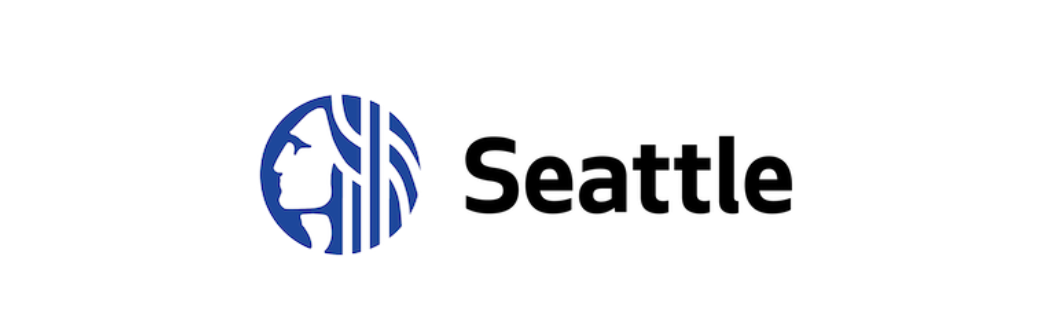

# Contexte

Client ville de Seattle.

Objectif : devenir une ville neutre en émissions de carbone en 2050. 

Sujet : consommation et les émissions des bâtiments non destinés à l’habitation. 

La prédiction se basera sur les données structurelles des bâtiments : taille et usage des 

Bâtiments, date de construction, situation géographique...)

Target : 
-	Emissions de co2 
-	Consommation totale d’énergie 

Dans ce Notebook notre but sera de sélectionner les bâtiments, et vérifier la cohérence des données, nous réaliserons ainsi des imputations de valeurs manquantes. 

In [1]:
package_list = {"pandas", "numpy", "matplotlib", "sklearn-learn"}

In [2]:
txt = !python  -m pip freeze
check = lambda i: any([(pack in i) for pack in package_list])
txt = [i for i in txt if check(i)]
txt

['matplotlib @ file:///C:/ci/matplotlib-suite_1660169687702/work',
 'matplotlib-inline==0.1.6',
 'numpy @ file:///C:/ci/numpy_and_numpy_base_1653574844560/work',
 'numpydoc @ file:///C:/Windows/TEMP/abs_30799058-86dd-4401-b621-d172137a4d87_ra3twm7/croots/recipe/numpydoc_1657529873713/work',
 'pandas @ file:///C:/b/abs_cdcgk91igc/croots/recipe/pandas_1663772960432/work']

# Imports

Importons dans un premier temps l'ensemble des librairies qui vont nous servir durant l'entièreté de ce Notebook :

In [1]:
# builtin
import os

#data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#feature engineering
from sklearn.feature_selection import mutual_info_regression

#Afficher toutes le colonnes du data frame : 
pd.set_option('display.max_columns', 80)
pd.set_option("display.max_row", 80)

sns.set(style='whitegrid', palette='muted', color_codes=True)
print('OK!! ')

OK!! 


# Importation du fichier

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '00_Cleaning.ipynb',
 '01_EDA.ipynb',
 '02_features_engineering.ipynb',
 '03_modelisation.ipynb',
 'cache',
 'data',
 'resources',
 'shap_values',
 'Untitled.ipynb',
 '_FUNCTIONS_.ipynb',
 '_VERSIONS_.ipynb']

In [2]:
os.listdir("data/source")

['2016_Building_Energy_Benchmarking.csv']

<span style="font-size:16px;">Les données sont Téléchargeables en suivant le lien suivant  : [Les données](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv)

<span style="font-size:16px;">Nous pouvons à présent charger le jeu de données, dans un dataframe que nous nommerons ici **`data`**.

In [3]:
path = "./data/source/"
filename = "2016_Building_Energy_Benchmarking.csv"

In [4]:
data = pd.read_csv(path+filename)

In [5]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


## Display

In [6]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
data.tail()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,153655.0000,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.0,116221.0000,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,525251.6875,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,1,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,102248.0000,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57
3375,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,2,GREATER DUWAMISH,47.53939,-122.29536,1938,1.0,1,18258,0,18258,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,8271.0,Fitness Center/Health Club/Gym,8000.0,Pre-school/Daycare,1108.0,NaN,NaN,63.099998,70.900002,115.800003,123.900002,1.152896e+06,1.293722e+06,0.0,126774.3984,4.325542e+05,7203.419922,7.203420e+05,False,NaN,Compliant,NaN,41.27,2.26


In [8]:
data.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1829,23530,2016,Multifamily LR (1-4),Low-Rise Multifamily,Capitol Hill Townhomes,1717-1718 16th Ave.,Seattle,WA,98122.0,7698400000,3,EAST,47.61701,-122.31171,1980,1.0,3,49106,0,49106,Multifamily Housing,Multifamily Housing,49106.0,NaN,NaN,NaN,NaN,NaN,34.0,24.200001,26.400000,76.099998,83.000000,1.190734e+06,1.298706e+06,0.0,3.489840e+05,1190733.0,0.000000,0.0,False,NaN,Compliant,NaN,8.30,0.17
1938,23894,2016,Multifamily MR (5-9),Mid-Rise Multifamily,Courtland Place at Rainier Court,3621 33rd Avenue S,Seattle,WA,98144.0,7879400030,2,SOUTHEAST,47.57108,-122.29160,2004,1.0,7,193946,0,193946,"Lifestyle Center, Multifamily Housing, Office,...",Multifamily Housing,163183.0,Office,36869.0,Parking,21811.0,NaN,80.0,42.200001,44.500000,98.400002,102.699997,8.819864e+06,9.291482e+06,0.0,1.584483e+06,5406257.0,34136.058590,3413606.0,False,NaN,Compliant,NaN,218.99,1.13
1704,23170,2016,Multifamily LR (1-4),Low-Rise Multifamily,The Court at Northgate,11300 3red Ave NE,Seattle,WA,98125.0,8565100000,5,North,47.71103,-122.32479,1978,1.0,3,135955,0,135955,"Multifamily Housing, Parking",Multifamily Housing,143098.0,Parking,0.0,NaN,NaN,NaN,61.0,28.100000,29.400000,81.300003,85.300003,4.027135e+06,4.210997e+06,0.0,1.037534e+06,3540065.0,4870.689453,487069.0,False,NaN,Compliant,NaN,50.55,0.37
457,618,2016,NonResidential,Small- and Mid-Sized Office,Prefontaine,110 Prefontaine Pl S,Seattle,WA,98104.0,5247801045,7,DOWNTOWN,47.60159,-122.32915,1909,1.0,6,73470,0,73470,"Non-Refrigerated Warehouse, Office, Retail Store",Office,47145.0,Non-Refrigerated Warehouse,9477.0,Retail Store,9477.0,NaN,83.0,48.599998,51.599998,152.600006,161.899994,3.212269e+06,3.408134e+06,0.0,9.414621e+05,3212269.0,0.000000,0.0,True,NaN,Error - Correct Default Data,NaN,22.39,0.30
1576,22547,2016,NonResidential,Self-Storage Facility,Mahoney Warehouse,2656 15TH AVE W,Seattle,WA,98119.0,2770603945,7,MAGNOLIA / QUEEN ANNE,47.64455,-122.37581,1980,1.0,3,30989,0,30989,Self-Storage Facility,Self-Storage Facility,30989.0,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,3.200000,9.900000,10.000000,9.769040e+04,9.886290e+04,0.0,2.863140e+04,97690.0,0.000000,0.0,False,NaN,Compliant,NaN,0.68,0.02


## Structure 

In [9]:
# Information de notre data frame 
data.info(verbose=True,show_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [10]:
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [11]:
data.nunique().sort_values(ascending=True)

Comments                              0
DataYear                              1
State                                 1
City                                  1
DefaultData                           2
Outlier                               2
ComplianceStatus                      4
CouncilDistrictCode                   7
BuildingType                          8
NumberofBuildings                    17
Neighborhood                         19
PrimaryPropertyType                  24
ThirdLargestPropertyUseType          44
SecondLargestPropertyUseType         50
NumberofFloors                       50
ZipCode                              55
LargestPropertyUseType               56
YearsENERGYSTARCertified             65
ENERGYSTARScore                     100
YearBuilt                           113
SteamUse(kBtu)                      131
ListOfAllPropertyUseTypes           466
PropertyGFAParking                  496
ThirdLargestPropertyUseTypeGFA      501
GHGEmissionsIntensity               511


## Nan & duplicated

In [12]:
data.isna().mean().sort_values(ascending=False) * 100

Comments                           100.000000
Outlier                             99.052133
YearsENERGYSTARCertified            96.475118
ThirdLargestPropertyUseType         82.345972
ThirdLargestPropertyUseTypeGFA      82.345972
SecondLargestPropertyUseType        50.266588
SecondLargestPropertyUseTypeGFA     50.266588
ENERGYSTARScore                     24.970379
LargestPropertyUseTypeGFA            0.592417
LargestPropertyUseType               0.592417
ZipCode                              0.473934
ListOfAllPropertyUseTypes            0.266588
SourceEUIWN(kBtu/sf)                 0.266588
SourceEUI(kBtu/sf)                   0.266588
Electricity(kWh)                     0.266588
Electricity(kBtu)                    0.266588
NaturalGas(therms)                   0.266588
NaturalGas(kBtu)                     0.266588
TotalGHGEmissions                    0.266588
SteamUse(kBtu)                       0.266588
GHGEmissionsIntensity                0.266588
NumberofBuildings                 

<AxesSubplot:>

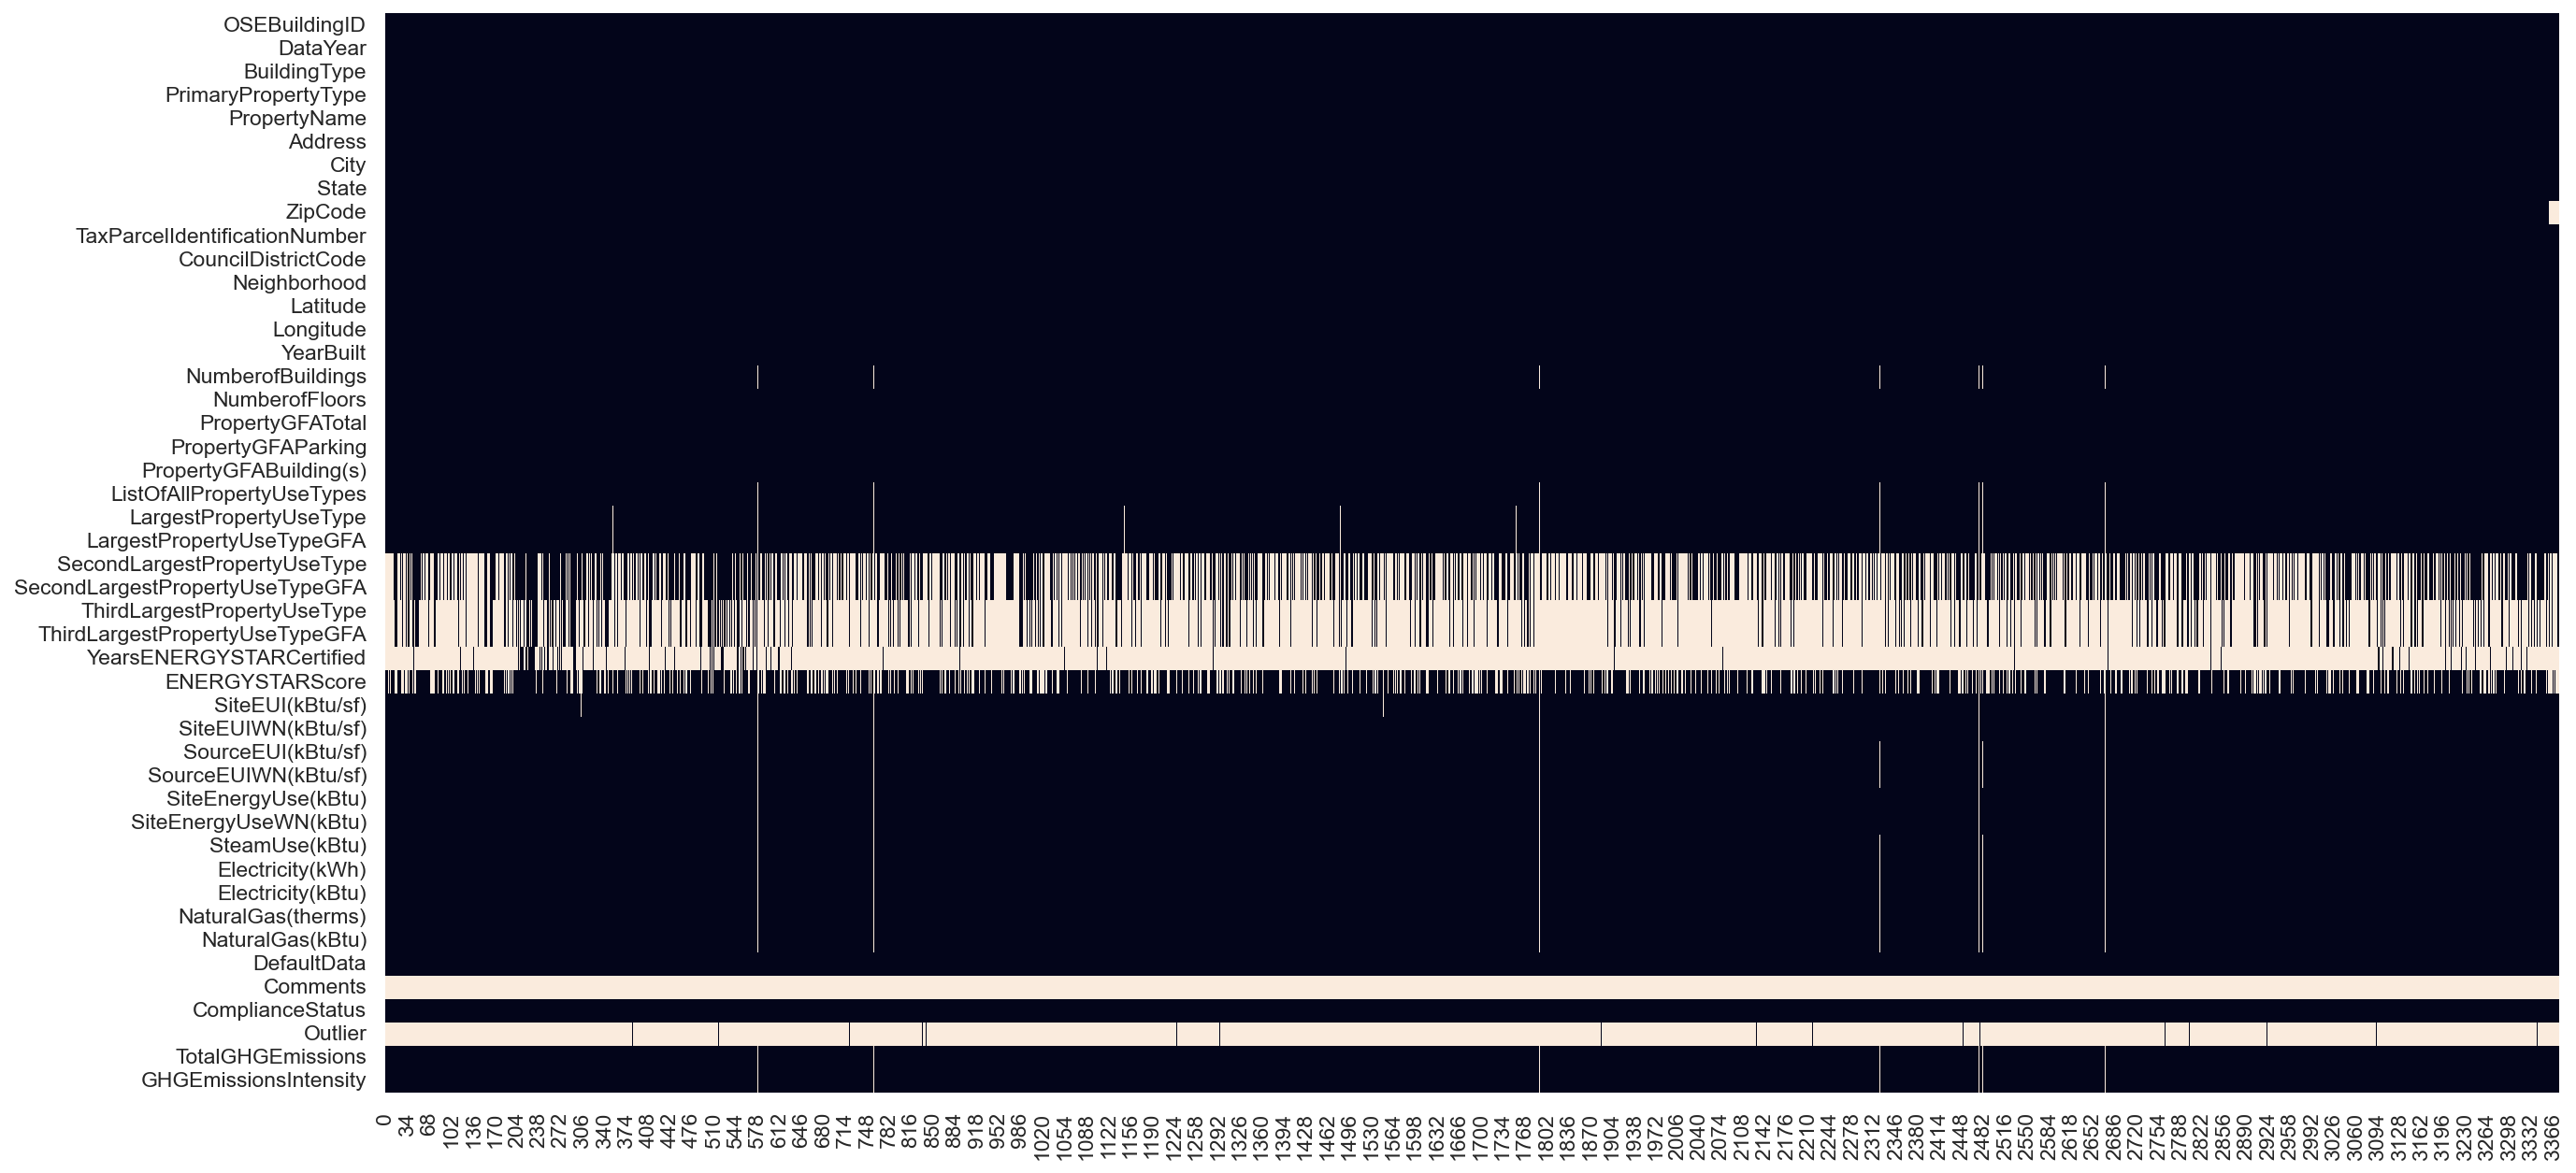

In [13]:
# HeatMap valeurs Nan
fig, ax = plt.subplots(figsize=(20, 10), dpi=150)

(sns.heatmap(data.isna().transpose(), cbar=False))

In [14]:
# Fonction qui permet de calculer et de retourner un dat frame (des données manquantes par colonnes)
def check_missing(df):
    
    # Total NaN/Features: 
    total = df.isnull().sum().sort_values(ascending = False) 
    
    # Pourcentage NaN/Features:
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    
    # Sortie sous forme d'un data frame: 
    missing_data  = pd.concat([total, percent], axis=1, keys=['Total_NAN', 'Percent'])
    return missing_data

In [15]:
# NaN
missing_data= check_missing(data)

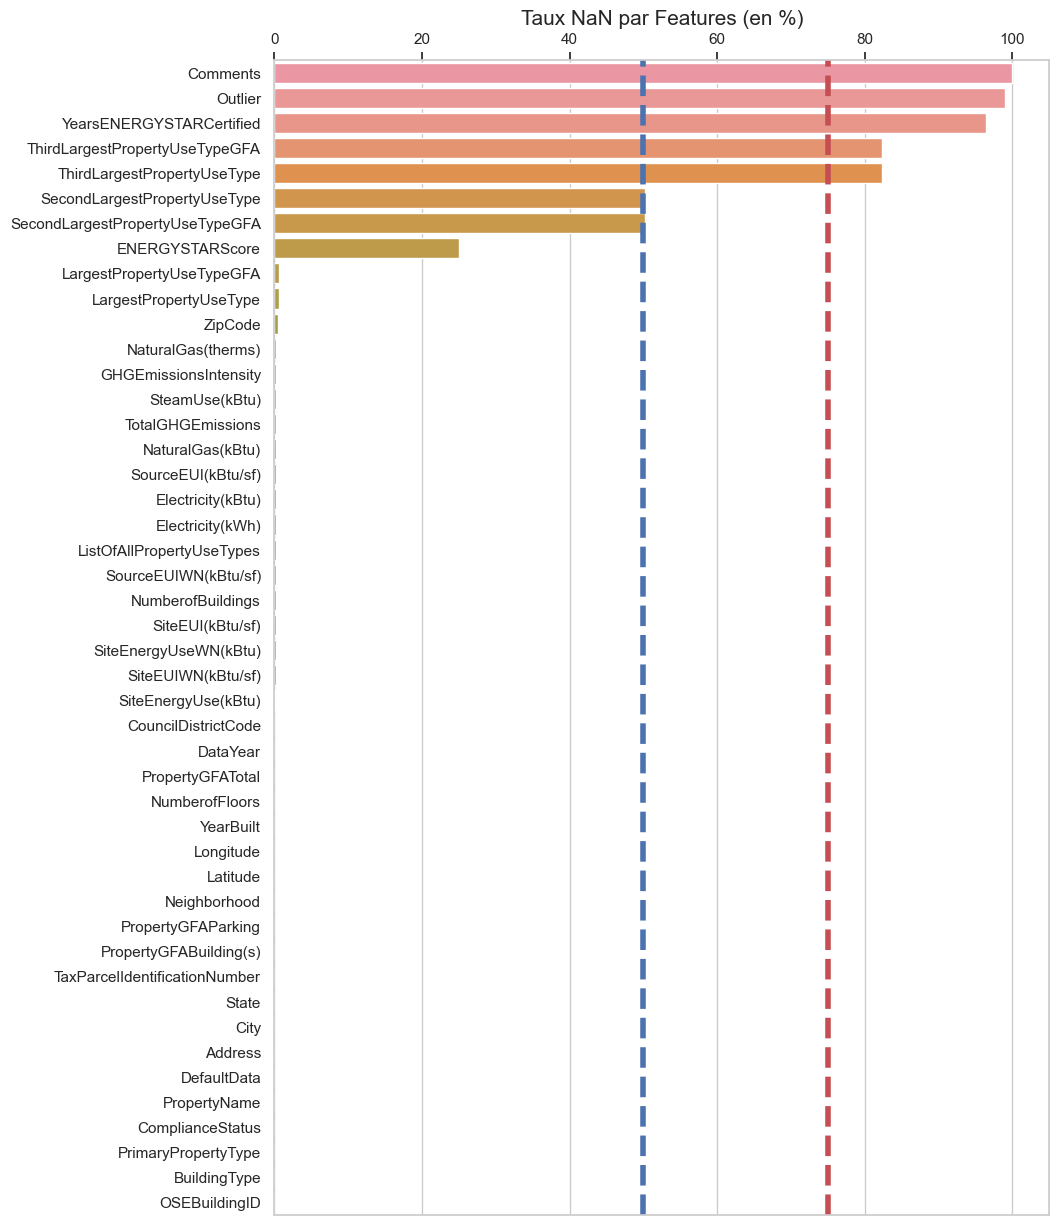

In [16]:
# Représentation graphique

sns.set(style="whitegrid")
missing_data = missing_data.sort_values('Percent', ascending=False)
fig = plt.figure(figsize=(10, 15))
ax = sns.barplot(y = missing_data.index, x= (missing_data['Percent'].values).round(2))

# limitation 50%  et 75% de données manquantes : 
ax.axvline(50,linewidth=4, color='b',linestyle="--") 
ax.axvline(75,linewidth=4, color='r',linestyle="--")

ax.xaxis.set_ticks_position('top')
plt.title('Taux NaN par Features (en %)', size=15)
# plt.savefig("figures/taux_nan.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()



In [17]:
data.duplicated().sum()

0

In [18]:
data.drop(columns= "OSEBuildingID").duplicated().sum()

0

In [19]:
# Shape
print(f'Le dataFrame est composé de  {data.shape[0]} lignes et {data.shape[1]} colonnes.')

Le dataFrame est composé de  3376 lignes et 46 colonnes.


<span style="font-size:16px;">Notre jeu de données est composé de **`3376 lignes`**, qui correspondent chaque ligne étant  **`un bâtiment`**, et **`46 colonnes`** qui décrivent les différentes **caractéristiques et consommation en énergies** des bâtiments. </span>

<span style="font-size:16px;">Nous remarquons que **plusieurs features sont complètement vides :  Comments**, la colonne **Outlier** dispose de 32 valeurs non-null, les autres colonnes semblent bien remplies

## Inspection des données

In [20]:
#Statistiques descriptives : variables quantitatives
round(data.describe())

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.0,3376.0,3360.0,3376.0,3376.0,3376.0,3376.0,3368.0,3376.0,3376.0,3376.0,3376.0,3356.0,1679.0,596.0,2533.0,3369.0,3370.0,3367.0,3367.0,3371.0,3370.0,3367.0,3367.0,3367.0,3367.0,3367.0,0.0,3367.0,3367.0
mean,21209.0,2016.0,98117.0,4.0,48.0,-122.0,1969.0,1.0,5.0,94834.0,8002.0,86832.0,79178.0,28444.0,11739.0,68.0,55.0,57.0,134.0,138.0,5403667.0,5276726.0,274596.0,1086639.0,3707612.0,13685.0,1368505.0,NaN,120.0,1.0
std,12224.0,0.0,19.0,2.0,0.0,0.0,33.0,2.0,5.0,218838.0,32327.0,207940.0,201703.0,54393.0,29331.0,27.0,56.0,57.0,139.0,139.0,21610629.0,15938786.0,3912173.0,4352478.0,14850656.0,67098.0,6709781.0,NaN,539.0,2.0
min,1.0,2016.0,98006.0,1.0,47.0,-122.0,1900.0,0.0,0.0,11285.0,0.0,3636.0,5656.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.0,0.0,0.0,0.0,-33827.0,-115417.0,0.0,0.0,NaN,-1.0,-0.0
25%,19991.0,2016.0,98105.0,3.0,48.0,-122.0,1948.0,1.0,2.0,28487.0,0.0,27756.0,25095.0,5000.0,2239.0,53.0,28.0,29.0,75.0,78.0,925129.0,970182.0,0.0,187423.0,639487.0,0.0,0.0,NaN,9.0,0.0
50%,23112.0,2016.0,98115.0,4.0,48.0,-122.0,1975.0,1.0,4.0,44175.0,0.0,43216.0,39894.0,10664.0,5043.0,75.0,39.0,41.0,96.0,101.0,1803753.0,1904452.0,0.0,345130.0,1177583.0,3238.0,323754.0,NaN,34.0,1.0
75%,25994.0,2016.0,98122.0,7.0,48.0,-122.0,1997.0,1.0,5.0,90992.0,0.0,84276.0,76200.0,26640.0,10139.0,90.0,60.0,64.0,144.0,148.0,4222455.0,4381429.0,0.0,829318.0,2829632.0,11890.0,1189034.0,NaN,94.0,1.0
max,50226.0,2016.0,98272.0,7.0,48.0,-122.0,2015.0,111.0,99.0,9320156.0,512608.0,9320156.0,9320156.0,686750.0,459748.0,100.0,834.0,834.0,2620.0,2620.0,873923712.0,471613856.0,134943456.0,192577488.0,657074389.0,2979090.0,297909000.0,NaN,16871.0,34.0


In [21]:
data["ComplianceStatus"].value_counts()

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

In [22]:
data["Outlier"].value_counts()

Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

In [23]:
data["DefaultData"].value_counts()

False    3263
True      113
Name: DefaultData, dtype: int64

In [24]:
data["BuildingType"].value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [25]:
data["CouncilDistrictCode"].value_counts()

7    1037
3     596
2     509
4     367
5     338
1     282
6     247
Name: CouncilDistrictCode, dtype: int64

# Filtrage

<span style="font-size:16px;"> A présent nous passerons au filtrage des données : 

<span style="font-size:16px;"> Par sousi de lisibilité nous allons renomer quelque features comme suite : 

In [26]:
#Colonne à renomer
colonne_renomer = { 
               'PropertyGFABuilding(s)': 'GFABuilding_s',
               'NumberofFloors': 'NmbFloors', 
              'NumberofBuildings': 'NumBuildings', 
              'ListOfAllPropertyUseTypes':'All_UseTypes',
              'LargestPropertyUseType': 'Largest_UseType', 
               'LargestPropertyUseTypeGFA':'LargestUseType_GFA', 
               'SecondLargestPropertyUseType' : 'Second_UseType', 
               'SecondLargestPropertyUseTypeGFA' : 'SecondUseType_GFA',
               'ThirdLargestPropertyUseType' : 'Third_UseType', 
               'ThirdLargestPropertyUseTypeGFA' : 'ThirdUseType_GFA', 
               'YearsENERGYSTARCertified' : 'Certified_Years', 
               'SiteEUI(kBtu/sf)' : 'SiteEUI_kBtu_sf', 
               'SiteEUIWN(kBtu/sf)': 'SiteEUIWN_kBtu_sf',
               'SourceEUI(kBtu/sf)' : 'SourceEUI_kBtu_sf', 
               'SourceEUIWN(kBtu/sf)' : 'SourceEUIWN_kBtu_sf',
               'SiteEnergyUse(kBtu)' : 'SiteEnergyUse_kBtu',
               'SiteEnergyUseWN(kBtu)' : 'SiteEnergyUseWN_kBtu', 
               'SteamUse(kBtu)' : 'SteamUse_kBtu', 
               'Electricity(kWh)' : 'Electricity_kWh', 
               'Electricity(kBtu)' : 'Electricity_kBtu',
               'NaturalGas(therms)' : 'NaturalGas_therms',
               'NaturalGas(kBtu)' : 'NaturalGas_kBtu'
              }
df = data.rename(columns=colonne_renomer, inplace=True)

<span style="font-size:16px;">Analysons certaines features intéressantes : 

In [27]:
# Conformité des données
data['ComplianceStatus'].value_counts(ascending=False)

Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: ComplianceStatus, dtype: int64

<span style="font-size:16px;">**Filtre 01** : Nous gardons que les données conformes : 

In [28]:
#Filtre
df = data.copy()
compliant = ['Compliant']
df = df[df['ComplianceStatus'].isin(compliant)]

<span style="font-size:16px;">**Filtre 02**: Regardons à présent les types des bâtiments

In [29]:
#Type du bâtiment
df['BuildingType'].value_counts(ascending=False)

NonResidential          1432
Multifamily LR (1-4)     985
Multifamily MR (5-9)     570
Multifamily HR (10+)     108
Nonresidential COS        81
Campus                    24
SPS-District K-12         10
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [30]:
# Mise en forme : 
data['BuildingType'] = data['BuildingType'].replace('Nonresidential WA', 'NonResidential')

In [31]:
Non_Residential = ['NonResidential', 'Nonresidential COS', 'Campus', 'SPS-District K-12']
df = df[df['BuildingType'].isin(Non_Residential)]

<span style="font-size:16px;">**Filtre 03** : Regardons de plus près le type d'usage afin d'affinier notre filtrage

In [32]:
#Première utilisation du bâtiment (utilisation principale)
df['PrimaryPropertyType'].value_counts(ascending=False)

Small- and Mid-Sized Office    286
Other                          245
Warehouse                      185
Large Office                   169
Mixed Use Property             113
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
K-12 School                     50
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

<span style="font-size:16px;">Nous remarquons qu'il existe encore des bâtiments destinés à l'habitation, notamment `Mid-Rise Multifamily`, `Senior Care Community`, `Residence Hall`, `Low-Rise Multifamily` et `High-Rise Multifamily`   nous allons les enlever : 

In [33]:
Residential = ['Residence Hall', 'Senior Care Community', 'Low-Rise Multifamily']
df = df[~df['PrimaryPropertyType'].isin(Residential)]
df.shape

(1504, 46)

In [34]:
df = df[df['Outlier'].isna()]
df.shape

(1504, 46)

<span style="font-size:16px;">Le programme d'analyse comparative et de rapport sur l'énergie des bâtiments de Seattle (SMC 22.920) exige que les propriétaires de bâtiments non résidentiels et multifamiliaux (20 000 pieds carrés ou plus) suivent les performances énergétiques et fassent rapport chaque année à la ville de Seattle.
    
<span style="font-size:16px;">Nous supprimerons les bâtiments qui ne respectent pas cette  condition de surface : 

In [35]:
# Nombre de bâtiments dont la superficie totale est inférieure à 20 000 pieds carrés :
df.loc[df['PropertyGFATotal'] < 20000,:].shape 

(11, 46)

In [36]:
df = df.loc[df['PropertyGFATotal'] > 20000,:]
df.shape

(1491, 46)

# Outlier

In [37]:
from sklearn.ensemble import IsolationForest

In [38]:
# On va modéliser nos données avec une IsolationForest pour repérer les outliers

df_ = df.select_dtypes(np.number)
df_ = df_.dropna(axis=1)

model_if = IsolationForest(random_state=0, contamination=0.02)
model_if.fit(df_)
outliers = model_if.predict(df_) == -1

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [39]:
print(df.shape)

(1491, 46)


In [40]:
df = df[~outliers]

In [41]:
print(df.shape)

(1461, 46)


<span style="font-size:16px;">Notre jeu de données se compose à présent de `1461 Lignes`  et `46 Colonnes`

<span style="font-size:16px;">Vérifions la cohérence des données : 

# Cohérence des données

<span style="font-size:16px;">Nous vérifions la cohérence des données, c'est-à-dire si les colonnes respectent bien la logique de calculs, Nous allons afficher quelques infos sur notre jeu de données

In [42]:
def rapport_df(df): 
    #Valeurs manquantes
    def check_missing(df):
    # Total NaN/Features: 
        total = df.isnull().sum().sort_values(ascending = False) 
        # Pourcentage NaN/Features:
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
        # Sortie sous forme d'un data frame: 
        df_missing  = pd.concat([total, percent], axis=1, keys=['Total_NAN', 'Percent'])
        return df_missing

    missing_data= check_missing(df)
    liste_features_vides = list((missing_data[missing_data.Percent == 100 ]).index)
    nombre_col_vides = len(liste_features_vides)
    
    # calcul du taux de valeurs manquantes : 
    taux_remplissage = (df.notnull().sum().sum()/np.product(df.shape)) * 100
    
    # Nombre de valeurs en double : 
    valeurDoubl = df.duplicated(subset=["OSEBuildingID"]).sum()

    print('Le Taux de remplissage total est égal à :', round(taux_remplissage,2), "%")   
    print('Le Nombre de features vides est égal à :', nombre_col_vides, "Features")
    print('Les Features vides sont :', liste_features_vides)
    print('Le Nombre de Valeurs en double est égal à :', valeurDoubl, "valeurs")
    print()
    print("*****Nombre de catégorie features catégorielles******\n")
    # Nombre de catégories par varaible qualitatives
    for col in df.select_dtypes('object'):
        print(f'{col :-<50} {df[col].unique().size}')

In [43]:
rapport_df(df)

Le Taux de remplissage total est égal à : 87.46 %
Le Nombre de features vides est égal à : 2 Features
Les Features vides sont : ['Outlier', 'Comments']
Le Nombre de Valeurs en double est égal à : 0 valeurs

*****Nombre de catégorie features catégorielles******

BuildingType-------------------------------------- 4
PrimaryPropertyType------------------------------- 18
PropertyName-------------------------------------- 1458
Address------------------------------------------- 1440
City---------------------------------------------- 1
State--------------------------------------------- 1
TaxParcelIdentificationNumber--------------------- 1391
Neighborhood-------------------------------------- 18
All_UseTypes-------------------------------------- 346
Largest_UseType----------------------------------- 54
Second_UseType------------------------------------ 48
Third_UseType------------------------------------- 37
Certified_Years----------------------------------- 61
ComplianceStatus----------------

<span style="font-size:16px;"> Nous supprimons les colonnes vides :

In [44]:
df.drop(['Outlier', 'Comments'], axis = 1, inplace = True)
df.shape

(1461, 44)

### Quartier

In [45]:
# Quartier
df['Neighborhood'].value_counts(ascending=False)

DOWNTOWN                 335
GREATER DUWAMISH         319
MAGNOLIA / QUEEN ANNE    139
LAKE UNION               138
EAST                     105
NORTHEAST                 99
NORTHWEST                 70
BALLARD                   54
NORTH                     48
CENTRAL                   38
DELRIDGE                  36
SOUTHWEST                 30
SOUTHEAST                 28
North                      7
Ballard                    5
Delridge                   4
Northwest                  3
Central                    3
Name: Neighborhood, dtype: int64

In [46]:
#Correction orthographe de certains quartier et mise en forme
# df['Neighborhood'] = df['Neighborhood'].str.upper()

df['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
df['Neighborhood'].replace('North', 'NORTH', inplace=True)
df['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)
df['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
df['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
df['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)

<span style="font-size:16px;">À présent nous allons supprimer quelques features non intéressantes dans notre analyse

In [47]:
# Duplicatats ? 
df.loc[df.duplicated(subset=['OSEBuildingID'], keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,Certified_Years,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kWh,Electricity_kBtu,NaturalGas_therms,NaturalGas_kBtu,DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity


- PropertyName : 
- Address: 
- City : 
- State : 
- ZipCode : 
- TaxParcelIdentificationNumber : 
- ComplianceStatus :  
- DefaultData : 
- Latitude :
- Longitude :

In [48]:
features_pas_important = ['PropertyName','Address','City','State','ZipCode','TaxParcelIdentificationNumber',
                          'ComplianceStatus','DefaultData', 'Certified_Years','Latitude','Longitude','OSEBuildingID'
                         ]
df = df[df.columns[~df.columns.isin(features_pas_important)]]
df.shape

(1461, 32)

<span style="font-size:16px;">Notre jeu de données se compose à présent de `1461 Lignes`  et `32 Colonnes`

### Le nombre de bâtiment

In [49]:
masque_building =  df['NumBuildings'] == 0
df[masque_building].head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kWh,Electricity_kBtu,NaturalGas_therms,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
63,2016,NonResidential,Medical Office,3,EAST,1965,0.0,3,179014,0,179014,Medical Office,Medical Office,179014.0,NaN,NaN,NaN,NaN,48.0,93.300003,92.300003,213.399994,210.300003,16701055.00,16527711.00,0.0,2.897563e+06,9886484.0,68145.70313,6814570.0,430.84,2.41
76,2016,NonResidential,Small- and Mid-Sized Office,7,MAGNOLIA / QUEEN ANNE,1986,0.0,2,66240,2352,63888,"Data Center, Distribution Center, Office, Park...",Office,45900.0,Data Center,5181.0,Distribution Center,4551.0,NaN,74.900002,75.400002,235.199997,236.600006,4166306.25,4192107.75,0.0,1.221074e+06,4166305.0,0.00000,0.0,29.04,0.44
160,2016,NonResidential,Warehouse,1,GREATER DUWAMISH,1916,0.0,4,79600,0,79600,Non-Refrigerated Warehouse,Non-Refrigerated Warehouse,79600.0,NaN,NaN,NaN,NaN,34.0,30.299999,30.299999,95.099998,95.099998,2411402.25,2411402.25,0.0,7.067415e+05,2411402.0,0.00000,0.0,16.81,0.21
201,2016,NonResidential,Large Office,7,DOWNTOWN,1968,0.0,3,100734,26731,74003,Office,Office,100734.0,NaN,NaN,NaN,NaN,20.0,97.199997,98.199997,305.100006,308.399994,9788717.00,9892566.00,0.0,2.868908e+06,9788716.0,0.00000,0.0,68.24,0.68
241,2016,NonResidential,Small- and Mid-Sized Office,4,NORTHEAST,1961,0.0,5,99005,0,99005,Office,Office,79555.0,NaN,NaN,NaN,NaN,70.0,59.400002,63.000000,137.600006,140.699997,4728488.50,5008123.50,0.0,8.391593e+05,2863212.0,18652.76563,1865277.0,119.03,1.20


In [50]:
# Nous remplacerons par 1, pour au minimum un bâtiment
df.loc[masque_building, 'NumBuildings'] = 1

### NumberofFloors

In [51]:
masque_floors = df['NmbFloors'] == 0 
df[masque_floors].head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kWh,Electricity_kBtu,NaturalGas_therms,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
166,2016,NonResidential,Hotel,7,DOWNTOWN,1999,1.0,0,934292,0,934292,"Hotel, Other, Parking, Restaurant, Retail Store",Hotel,495536.0,Parking,438756.0,Restaurant,49700.0,NaN,117.900002,120.500000,272.899994,278.200012,65047284.0,66502836.0,0.0,11536962.00,39364114.0,256831.62500,25683162.0,1638.46,1.75
487,2016,NonResidential,Medical Office,3,EAST,2004,1.0,0,225982,0,225982,Medical Office,Medical Office,200184.0,NaN,NaN,NaN,NaN,53.0,102.699997,103.699997,246.899994,245.300003,20560622.0,20764814.0,7815663.0,3735333.25,12744957.0,0.00000,0.0,692.12,3.06
488,2016,NonResidential,Mixed Use Property,7,DOWNTOWN,2006,1.0,0,516407,0,516407,"Financial Office, Hotel, Multifamily Housing, ...",Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,31.0,76.300003,78.900002,199.199997,202.000000,39403320.0,40754364.0,0.0,8626261.00,29432803.0,99705.11719,9970512.0,734.72,1.42
564,2016,NonResidential,Other,7,DOWNTOWN,1999,1.0,0,947987,0,947987,"Office, Other - Entertainment/Public Assembly,...",Other - Mall,561684.0,Other - Entertainment/Public Assembly,100000.0,Restaurant,80000.0,NaN,62.299999,62.099998,195.600006,194.899994,46510960.0,46343304.0,0.0,13631581.00,46510954.0,0.00000,0.0,324.25,0.34
1754,2016,NonResidential,Medical Office,3,EAST,1945,1.0,0,274568,0,274568,"Medical Office, Parking",Medical Office,228133.0,Parking,135954.0,NaN,NaN,52.0,111.000000,111.199997,235.500000,233.100006,25311526.0,25358122.0,13296249.0,3521475.75,12015275.0,0.00000,0.0,1110.07,4.04


In [52]:
# Nous remplacerons par 1 également
df.loc[masque_floors, 'NmbFloors'] = 1

### Les surface et consommation

 <span style="font-size:16px;">**Surface de plancher brute : GFA (Gross floor area) Total :**

In [53]:
df['PropertyGFATotal'].sum() == (df['PropertyGFAParking'].sum() + df['GFABuilding_s'].sum())

True

<span style="font-size:16px;">**Surface brute des parkings:**

In [54]:
df['PropertyGFAParking'].sum() == (df['PropertyGFATotal'] - df['GFABuilding_s']).sum()

True

<span style="font-size:16px;">**Surface brute des bâtiments hors parkings:**

In [55]:
df['GFABuilding_s'].sum() == (df['PropertyGFATotal'] - df['PropertyGFAParking']).sum()

True

<span style="font-size:16px;">Utilisation d'énérgie par le site (bâtiment)

In [56]:
df['SiteEnergyUse(kBtu)_test'] = (df['SteamUse_kBtu'] + df['Electricity_kBtu'] + df['NaturalGas_kBtu'])

In [57]:
total = df.groupby('PrimaryPropertyType')[['SiteEnergyUse_kBtu','SiteEnergyUse(kBtu)_test']].mean().reset_index()
total = total.set_index('PrimaryPropertyType')

<Figure size 1400x1400 with 0 Axes>

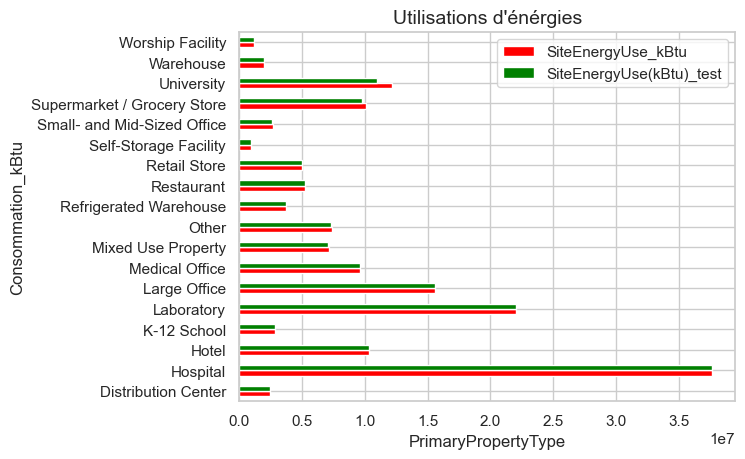

In [73]:
# Répartition de la consommation d'énergie totale selon le type d'usage : 
plt.figure(figsize=(14, 14))
total.plot(kind='barh', stacked=False, color=['red', 'green']).set_title("Utilisations d'énérgies",fontsize=14)
plt.xlabel('PrimaryPropertyType')
plt.ylabel('Consommation_kBtu')
plt.savefig("figures/consommation_energie_typedusage.png", transparent=True, bbox_inches='tight', dpi=200)
plt.show()

<span style="font-size:16px;">On remarque de légères différence concernant les université, les Supermarket Grocerry Store, les autres catégories sembles respecter le mode calcul.

In [66]:
sum_diff = ((df['SiteEnergyUse(kBtu)_test'] - df['SiteEnergyUse_kBtu']))
round(sum_diff.median(),2)

-0.31

In [67]:
msk = (df['SiteEnergyUse(kBtu)_test'] == df['SiteEnergyUse_kBtu'])
df.loc[msk,:].shape

(218, 33)

In [68]:
msk = ((df['SiteEnergyUse(kBtu)_test'] - df['SiteEnergyUse_kBtu']) < 10)
df.loc[msk,:].shape

(1458, 33)

In [69]:
msk = ((df['SiteEnergyUse(kBtu)_test'] - df['SiteEnergyUse_kBtu']) > 10)
df.loc[msk,:]

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kWh,Electricity_kBtu,NaturalGas_therms,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity,SiteEnergyUse(kBtu)_test
206,2016,NonResidential,Large Office,7,DOWNTOWN,1976,1.0,33,791396,0,791396,"Lifestyle Center, Office, Other, Parking, Rest...",Office,622034.0,Parking,132465.0,Other,33110.0,89.0,60.299999,62.400002,189.500000,195.899994,40847752.0,42227404.0,0.0,1.196941e+07,40839637.0,5382.505371,538251.0,313.30,0.40,41377888.0
563,2016,NonResidential,Large Office,7,DOWNTOWN,1979,1.0,7,131143,87160,43983,"Office, Retail Store",Office,120248.0,Retail Store,10853.0,NaN,NaN,93.0,39.500000,NaN,128.000000,0.000000,5177270.5,NaN,0.0,1.427645e+06,4871126.0,14160.409180,1416041.0,109.16,0.83,6287167.0
2441,2016,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,1909,1.0,3,47215,0,47215,"Office, Retail Store",Office,23659.0,Retail Store,22376.0,NaN,NaN,58.0,45.500000,46.400002,131.600006,135.100006,2092696.0,2136896.0,0.0,4.682223e+05,1597575.0,9918.134766,991813.0,63.81,1.35,2589388.0


In [70]:
# Correction des valeurs
df['SiteEnergyUse_kBtu'] = (df['SteamUse_kBtu'] + df['Electricity_kBtu'] + df['NaturalGas_kBtu'])

<span style="font-size:16px;">Intesnsité utilisation  d'énérgie par le site, par pied au carré : 

In [71]:
df['SiteEUI(kBtu/sf)_test'] = (df['SiteEnergyUse_kBtu'] / df['PropertyGFATotal'])

In [72]:
div_diff = df['SiteEUI(kBtu/sf)_test'] - df['SiteEUI_kBtu_sf']
round(div_diff.median(),2)

-0.03

In [73]:
msk = ((df['SiteEUI(kBtu/sf)_test'] - df['SiteEUI_kBtu_sf']) < 10)
df.loc[msk,:].shape

(1391, 34)

In [74]:
msk = ((df['SiteEUI(kBtu/sf)_test'] - df['SiteEUI_kBtu_sf']) > 10)
df.loc[msk,:].shape

(70, 34)

In [75]:
# Correction des valeurs
df['SiteEUI_kBtu_sf'] = df['SiteEnergyUse_kBtu'] / df['PropertyGFATotal']

In [76]:
df['SiteEUI_kBtu_sf'].sum() == ((df['SteamUse_kBtu'] + df['Electricity_kBtu'] + df['NaturalGas_kBtu']) / df['PropertyGFATotal']).sum()

True

In [77]:
# à présent nous supprimerons ces deux colonne NaturalGas(therms) et Electricity(kWh)
df.drop(['NaturalGas_therms', 'Electricity_kWh', 'SiteEUI(kBtu/sf)_test', 'SiteEnergyUse(kBtu)_test', ], 
        axis=1, 
        inplace=True)
df.shape

(1461, 30)

In [78]:
#Nous supprimerons les lignes dans la section traitement des valeurs aberrantes
(df['TotalGHGEmissions']==0).sum()

1

In [79]:
#Nous supprimerons les lignes dans la section traitement des valeurs aberrantes
(df['TotalGHGEmissions'] < 0).sum()

1

# Cleaning

## Imputation valeur Nan surface GFA

In [80]:
df.isna().mean().sort_values(ascending=False)*100

Third_UseType            77.754962
ThirdUseType_GFA         77.754962
Second_UseType           45.448323
SecondUseType_GFA        45.448323
ENERGYSTARScore          35.934292
Largest_UseType           0.273785
LargestUseType_GFA        0.273785
SiteEnergyUseWN_kBtu      0.068446
SiteEUIWN_kBtu_sf         0.068446
Electricity_kBtu          0.000000
SteamUse_kBtu             0.000000
SiteEnergyUse_kBtu        0.000000
NaturalGas_kBtu           0.000000
SourceEUI_kBtu_sf         0.000000
SiteEUI_kBtu_sf           0.000000
TotalGHGEmissions         0.000000
SourceEUIWN_kBtu_sf       0.000000
DataYear                  0.000000
BuildingType              0.000000
All_UseTypes              0.000000
GFABuilding_s             0.000000
PropertyGFAParking        0.000000
PropertyGFATotal          0.000000
NmbFloors                 0.000000
NumBuildings              0.000000
YearBuilt                 0.000000
Neighborhood              0.000000
CouncilDistrictCode       0.000000
PrimaryPropertyType 

### LargestUseType_GFA

In [81]:
df['LargestUseType_GFA'].isna().mean()

0.0027378507871321013

In [82]:
# Valeurs manquante LargetUseType et LargetUseType_GFA
# masque 1
mask = df['LargestUseType_GFA'].isna()
# on remplace les NaN par l'utilisation primaire : 
df.loc[mask,'Largest_UseType'] = df.loc[mask,'PrimaryPropertyType']
# Nous remplçons en même temps la superficie
df.loc[mask,'LargestUseType_GFA'] = df.loc[mask, 'PropertyGFATotal']

In [83]:
# masque 2
mask = ((df['PropertyGFAParking'] == 0) | (df['GFABuilding_s'] == 0))
df.loc[mask,'LargestUseType_GFA'] = df.loc[mask,'PropertyGFATotal']

In [84]:
df['LargestUseType_GFA'].isna().mean()

0.0

### SecondUseType_GFA

In [85]:
df['SecondUseType_GFA'].isna().mean()

0.4544832306639288

In [86]:
mask = df['LargestUseType_GFA'] == df['PropertyGFATotal'] 
df.loc[mask,'SecondUseType_GFA'] = 0

In [87]:
df.loc[mask,'SecondUseType_GFA'] = df.loc[mask,'SecondUseType_GFA'].fillna(0)

In [88]:
mask = df['SecondUseType_GFA'] != 0
df.loc[mask,'SecondUseType_GFA'] = df.loc[mask,'SecondUseType_GFA'].fillna(0)

In [89]:
df['SecondUseType_GFA'].isna().mean()

0.0

### ThirdUseType_GFA

In [90]:
df['ThirdUseType_GFA'].isna().mean()

0.7775496235455168

In [91]:
mask = df['SecondUseType_GFA'] == 0
df.loc[mask,'ThirdUseType_GFA'] = 0

In [92]:
mask = df['ThirdUseType_GFA'] != 0
df.loc[mask,'ThirdUseType_GFA'] = df.loc[mask,'ThirdUseType_GFA'].fillna(0)

In [93]:
df['ThirdUseType_GFA'].isna().mean()

0.0

<span style="font-size:16px;">Nous allons spliter la colonne All_UseType afin de récupérer quelques informations utiles : 

In [94]:
#Nous supprimons quelques lignes vides, qui ne comporte pas de données de consommation d'énérgie : 
df = df.dropna(subset=['SiteEUIWN_kBtu_sf', 'SiteEnergyUseWN_kBtu'])
df.shape

(1460, 30)

In [95]:
df.isna().mean().sort_values(ascending=False)*100

Third_UseType            77.739726
Second_UseType           45.479452
ENERGYSTARScore          35.958904
DataYear                  0.000000
TotalGHGEmissions         0.000000
NaturalGas_kBtu           0.000000
Electricity_kBtu          0.000000
SteamUse_kBtu             0.000000
SiteEnergyUseWN_kBtu      0.000000
SiteEnergyUse_kBtu        0.000000
SourceEUIWN_kBtu_sf       0.000000
SourceEUI_kBtu_sf         0.000000
SiteEUIWN_kBtu_sf         0.000000
SiteEUI_kBtu_sf           0.000000
ThirdUseType_GFA          0.000000
SecondUseType_GFA         0.000000
BuildingType              0.000000
LargestUseType_GFA        0.000000
Largest_UseType           0.000000
All_UseTypes              0.000000
GFABuilding_s             0.000000
PropertyGFAParking        0.000000
PropertyGFATotal          0.000000
NmbFloors                 0.000000
NumBuildings              0.000000
YearBuilt                 0.000000
Neighborhood              0.000000
CouncilDistrictCode       0.000000
PrimaryPropertyType 

## Imputation valeur Nan types d'utilisation

### Largest_UseType

In [96]:
# La colonne Larget_UseType est bien remplie
df['Largest_UseType'].isna().mean()


0.0

### Second_UseType

In [97]:
df['Second_UseType'].isna().mean()

0.4547945205479452

In [98]:
mask = (df['SecondUseType_GFA'] == 0)
df.loc[mask,'Second_UseType'] = 'Aucun'

In [99]:
mask = (df['SecondUseType_GFA'] != 0)
df.loc[mask,:].shape

(231, 30)

In [100]:
#Supression des espace au début
df['All_UseTypes'] = df['All_UseTypes'].str.lstrip()

In [101]:
# Réupération du deuxième type d'usage
df['ListOfAllPropertyUseTypes_2'] = df['All_UseTypes'].map(lambda row:row.split(",")).str[1]
# Remplacement des valeurs NaN du second type d'usage
df['Second_UseType'] = df['Second_UseType'].fillna(df['ListOfAllPropertyUseTypes_2'])

In [102]:
df['Second_UseType'].isna().mean()

0.0

### Third_UseType

In [103]:
df['Third_UseType'].isna().mean()

0.7773972602739726

In [104]:
mask = (df['ThirdUseType_GFA'] == 0)
df.loc[mask,'Third_UseType'] = np.nan
df.loc[mask,'Third_UseType'] = df.loc[mask,'Third_UseType'].fillna('Aucun')

In [105]:
mask = (df['ThirdUseType_GFA'] != 0)
df.loc[mask,'Third_UseType'].unique()

array(['Restaurant', 'Data Center', 'Retail Store', 'Office',
       'Distribution Center', 'Other', 'Food Service', 'Medical Office',
       'Parking', 'Fitness Center/Health Club/Gym', 'Pre-school/Daycare',
       'Convenience Store without Gas Station', 'Financial Office',
       'Other - Restaurant/Bar', 'Laboratory', 'Bank Branch',
       'Other - Technology/Science', 'Non-Refrigerated Warehouse',
       'Multifamily Housing', 'Other - Entertainment/Public Assembly'],
      dtype=object)

In [106]:
df['Third_UseType'].isna().mean()

0.0

In [107]:
df.drop(['ListOfAllPropertyUseTypes_2'], axis=1, inplace=True)
df.shape

(1460, 30)

In [108]:
df.isna().mean().sort_values(ascending=False)*100

ENERGYSTARScore          35.958904
DataYear                  0.000000
BuildingType              0.000000
TotalGHGEmissions         0.000000
NaturalGas_kBtu           0.000000
Electricity_kBtu          0.000000
SteamUse_kBtu             0.000000
SiteEnergyUseWN_kBtu      0.000000
SiteEnergyUse_kBtu        0.000000
SourceEUIWN_kBtu_sf       0.000000
SourceEUI_kBtu_sf         0.000000
SiteEUIWN_kBtu_sf         0.000000
SiteEUI_kBtu_sf           0.000000
ThirdUseType_GFA          0.000000
Third_UseType             0.000000
SecondUseType_GFA         0.000000
Second_UseType            0.000000
LargestUseType_GFA        0.000000
Largest_UseType           0.000000
All_UseTypes              0.000000
GFABuilding_s             0.000000
PropertyGFAParking        0.000000
PropertyGFATotal          0.000000
NmbFloors                 0.000000
NumBuildings              0.000000
YearBuilt                 0.000000
Neighborhood              0.000000
CouncilDistrictCode       0.000000
PrimaryPropertyType 

In [109]:
# On retire le 'Other' présent dans certaines valeurs des colonnes de type 'LargestPropertyUseType'.
for col in ['Largest_UseType', 'Second_UseType', 'Third_UseType']:
    # Valeurs commençant par 'Other -'
    mask = df[col].str.contains('Other -')
    df.loc[mask, col] = df.loc[mask, col].transform(lambda x: x.split(' - ')[1])
    # Autres valeurs contenant le mot 'Other'
    df.loc[df[col] == 'Other/Specialty Hospital', col] = 'Specialty Hospital'
    df.loc[df[col] == 'Urgent Care/Clinic/Other Outpatient', col] = 'Urgent Care/Clinic/Outpatient'
    # Il ne reste que la catégorie 'Other' qui contient ce mot
    print(df.loc[df[col].str.contains('Other'), col].unique())

['Other']
['Other']
['Other']


In [110]:
list(df['Largest_UseType'].unique())

['Hotel',
 'Police Station',
 'Entertainment/Public Assembly',
 'Library',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Courthouse',
 'Other',
 'College/University',
 'Automobile Dealership',
 'Office',
 'Self-Storage Facility',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Mall',
 'Medical Office',
 'Retail Store',
 'Hospital (General Medical & Surgical)',
 'Museum',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Lodging/Residential',
 'Specialty Hospital',
 'Financial Office',
 'Distribution Center',
 'Parking',
 'Multifamily Housing',
 'Worship Facility',
 'Restaurant',
 'Data Center',
 'Laboratory',
 'Supermarket/Grocery Store',
 'Urgent Care/Clinic/Outpatient',
 'Services',
 'Strip Mall',
 'Wholesale Club/Supercenter',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Recreation',
 'Lifestyle Center',
 'Public Services',
 'Fire Station',
 'Performing Arts',
 'Residential Care Facility',
 'Bank Branch',
 'Education',
 'Restaurant/Bar',
 'Food

In [111]:
list(df['Largest_UseType'].unique())

['Hotel',
 'Police Station',
 'Entertainment/Public Assembly',
 'Library',
 'Fitness Center/Health Club/Gym',
 'Social/Meeting Hall',
 'Courthouse',
 'Other',
 'College/University',
 'Automobile Dealership',
 'Office',
 'Self-Storage Facility',
 'Non-Refrigerated Warehouse',
 'K-12 School',
 'Mall',
 'Medical Office',
 'Retail Store',
 'Hospital (General Medical & Surgical)',
 'Museum',
 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
 'Lodging/Residential',
 'Specialty Hospital',
 'Financial Office',
 'Distribution Center',
 'Parking',
 'Multifamily Housing',
 'Worship Facility',
 'Restaurant',
 'Data Center',
 'Laboratory',
 'Supermarket/Grocery Store',
 'Urgent Care/Clinic/Outpatient',
 'Services',
 'Strip Mall',
 'Wholesale Club/Supercenter',
 'Refrigerated Warehouse',
 'Manufacturing/Industrial Plant',
 'Recreation',
 'Lifestyle Center',
 'Public Services',
 'Fire Station',
 'Performing Arts',
 'Residential Care Facility',
 'Bank Branch',
 'Education',
 'Restaurant/Bar',
 'Food

## Valeurs Aberrantes

<span style="font-size:16px;">Qu'en est-il des valeurs aberrantes ? nous allons affiner notre filtrage pour supprimer les outlier:

In [112]:
round(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
DataYear,1460.0,2016.0,0.0,2016.0,2016.0,2016.0,2016.0,2016.0
CouncilDistrictCode,1460.0,4.0,2.0,1.0,2.0,4.0,7.0,7.0
YearBuilt,1460.0,1961.0,33.0,1900.0,1929.0,1965.0,1988.0,2015.0
NumBuildings,1460.0,1.0,1.0,1.0,1.0,1.0,1.0,27.0
NmbFloors,1460.0,4.0,6.0,1.0,1.0,2.0,4.0,99.0
PropertyGFATotal,1460.0,102403.0,150865.0,20022.0,28843.0,47302.0,102342.0,1536606.0
PropertyGFAParking,1460.0,12940.0,40709.0,0.0,0.0,0.0,0.0,512608.0
GFABuilding_s,1460.0,89464.0,129233.0,10925.0,27937.0,45511.0,91757.0,1323055.0
LargestUseType_GFA,1460.0,89363.0,126418.0,8061.0,27866.0,45558.0,93168.0,1323055.0
SecondUseType_GFA,1460.0,9162.0,32520.0,0.0,0.0,0.0,0.0,377046.0


Les émeubles qui ont une consommation d'nérgie < 0 

In [113]:
features_verifier = ['NumBuildings', 'NmbFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFABuilding_s', 'LargestUseType_GFA',
                    'SecondUseType_GFA', 'ThirdUseType_GFA','ENERGYSTARScore', 'SiteEUI_kBtu_sf', 'SourceEUIWN_kBtu_sf',
                     'Electricity_kBtu','TotalGHGEmissions','GHGEmissionsIntensity']
for colum in features_verifier : 
    valeur_negative = df[df[colum] < 0]
    if(valeur_negative.shape[0]>0):
        print(colum)

SiteEUI_kBtu_sf
SourceEUIWN_kBtu_sf
Electricity_kBtu
TotalGHGEmissions
GHGEmissionsIntensity


In [114]:
#Features qui comporte des valeurs négatives : 
masque_neagtif = (df['SourceEUIWN_kBtu_sf'] <= 0) | (df['Electricity_kBtu'] <0) | (df['TotalGHGEmissions']<= 0) | (df['GHGEmissionsIntensity']<=0 )| (df['SourceEUIWN_kBtu_sf']<=0)

In [115]:
valeur_negatif = df[masque_neagtif]
valeur_negatif

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
220,2016,NonResidential,Large Office,7,DOWNTOWN,1958,1.0,17,378525,84600,293925,"Office, Parking",Office,236827.0,Parking,83311.0,Restaurant,14679.0,69.0,65.797847,0.000000,240.899994,0.0,24906130.00,0.000000e+00,10921066.00,13985064.0,0.0,940.47,2.48
247,2016,NonResidential,Large Office,7,DOWNTOWN,1988,1.0,20,497513,118744,378769,"Office, Parking",Office,367623.0,Parking,114510.0,Aucun,0.0,65.0,53.914601,0.000000,227.899994,0.0,26823215.00,0.000000e+00,0.00,26602310.0,220905.0,197.19,0.40
284,2016,NonResidential,Large Office,7,DOWNTOWN,1929,1.0,15,151039,0,151039,Office,Office,151039.0,Aucun,0.0,Aucun,0.0,84.0,36.061042,0.000000,92.300003,0.0,5446623.75,0.000000e+00,2850077.75,2596546.0,0.0,238.09,1.58
350,2016,NonResidential,Small- and Mid-Sized Office,7,MAGNOLIA / QUEEN ANNE,1971,1.0,5,88000,21600,66400,"Office, Parking",Office,69691.0,Parking,17487.0,Aucun,0.0,75.0,39.601307,0.000000,157.000000,0.0,3484915.00,0.000000e+00,0.00,3484915.0,0.0,24.29,0.28
513,2016,NonResidential,Supermarket / Grocery Store,7,MAGNOLIA / QUEEN ANNE,2008,1.0,1,57176,0,57176,"Personal Services (Health/Beauty, Dry Cleaning...",Supermarket/Grocery Store,57176.0,Aucun,0.0,Aucun,0.0,31.0,0.000000,214.100006,0.000000,0.0,0.00,1.284386e+07,0.00,0.0,0.0,0.00,0.00
882,2016,NonResidential,Worship Facility,6,NORTHWEST,1910,1.0,2,23931,0,23931,Worship Facility,Worship Facility,23931.0,Aucun,0.0,Aucun,0.0,88.0,20.746187,0.000000,36.400002,0.0,496477.00,0.000000e+00,0.00,167075.0,329402.0,18.66,0.78
953,2016,NonResidential,Worship Facility,4,NORTHEAST,2000,1.0,2,31386,0,31386,Worship Facility,Worship Facility,31386.0,Aucun,0.0,Aucun,0.0,52.0,35.945294,0.000000,89.000000,0.0,1128179.00,0.000000e+00,0.00,710478.0,417701.0,27.14,0.86
2791,2016,NonResidential,Mixed Use Property,2,DOWNTOWN,1909,1.0,3,49299,0,49299,"Multifamily Housing, Office, Restaurant",Office,49299.0,Aucun,0.0,Aucun,0.0,NaN,26.852309,90.900002,0.000000,0.0,1323792.00,4.821852e+06,0.00,1323792.0,0.0,9.23,0.19
3206,2016,NonResidential,Small- and Mid-Sized Office,3,CENTRAL,2013,1.0,6,52000,0,52000,Office,Office,52000.0,Aucun,0.0,Aucun,0.0,100.0,-2.219558,5.000000,2.000000,-2.1,-115417.00,2.401321e+05,0.00,-115417.0,0.0,-0.80,-0.02
3275,2016,NonResidential,University,4,NORTHEAST,1969,1.0,4,58779,0,58779,College/University,College/University,58779.0,Aucun,0.0,Aucun,0.0,NaN,63.274588,0.000000,221.000000,0.0,3719217.00,0.000000e+00,0.00,3719217.0,0.0,25.93,0.44


In [116]:
# Suppression des lignes 
df = df.drop(valeur_negatif.index)
df.shape

(1449, 30)

# Export csv

In [117]:
df.head()

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucun,0.0,Aucun,0.0,60.0,81.714748,84.300003,182.500000,189.000000,7226362.00,7456910.0,2003882.00,3946027.0,1276453.0,249.98,2.83
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,80.991184,97.900002,176.100006,179.399994,8387933.00,8664479.0,0.00,3242851.0,5145082.0,295.86,2.86
3,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucun,0.0,Aucun,0.0,56.0,110.805337,113.300003,216.199997,224.000000,6794583.25,6946800.5,2214446.25,2768924.0,1811213.0,286.43,4.67
4,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Aucun,0.0,75.0,80.718789,118.699997,211.399994,215.600006,14172605.00,14656503.0,0.00,5368607.0,8803998.0,505.01,2.88
5,2016,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,Aucun,0.0,Aucun,0.0,NaN,124.235425,141.600006,316.299988,320.500000,12086616.00,12581712.0,0.00,7371434.0,4715182.0,301.81,3.10


In [118]:
df_ = df.reset_index(drop=True)

In [119]:
df_

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumBuildings,NmbFloors,PropertyGFATotal,PropertyGFAParking,GFABuilding_s,All_UseTypes,Largest_UseType,LargestUseType_GFA,Second_UseType,SecondUseType_GFA,Third_UseType,ThirdUseType_GFA,ENERGYSTARScore,SiteEUI_kBtu_sf,SiteEUIWN_kBtu_sf,SourceEUI_kBtu_sf,SourceEUIWN_kBtu_sf,SiteEnergyUse_kBtu,SiteEnergyUseWN_kBtu,SteamUse_kBtu,Electricity_kBtu,NaturalGas_kBtu,TotalGHGEmissions,GHGEmissionsIntensity
0,2016,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,Aucun,0.0,Aucun,0.0,60.0,81.714748,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,249.98,2.83
1,2016,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,80.991184,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,295.86,2.86
2,2016,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,Aucun,0.0,Aucun,0.0,56.0,110.805337,113.300003,216.199997,224.000000,6.794583e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,286.43,4.67
3,2016,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Aucun,0.0,75.0,80.718789,118.699997,211.399994,215.600006,1.417260e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,505.01,2.88
4,2016,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2,97288,37198,60090,Police Station,Police Station,88830.0,Aucun,0.0,Aucun,0.0,NaN,124.235425,141.600006,316.299988,320.500000,1.208662e+07,1.258171e+07,0.00,7.371434e+06,4.715182e+06,301.81,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,2016,NonResidential,K-12 School,3,GREATER DUWAMISH,2015,1.0,3,45000,0,45000,"K-12 School, Parking",K-12 School,45000.0,Aucun,0.0,Aucun,0.0,77.0,29.466067,30.600000,91.099998,96.000000,1.325973e+06,1.397742e+06,0.00,1.325973e+06,0.000000e+00,9.24,0.21
1445,2016,NonResidential,Mixed Use Property,7,LAKE UNION,2015,1.0,6,345290,85028,260262,"Data Center, Laboratory, Museum, Office, Other...",Laboratory,151523.0,Office,106498.0,Parking,84002.0,NaN,114.003047,150.800003,333.100006,335.799988,3.936411e+07,4.107860e+07,0.00,2.363680e+07,1.572731e+07,1000.06,2.90
1446,2016,Nonresidential COS,Mixed Use Property,5,NORTH,2005,1.0,1,20616,0,20616,"Fitness Center/Health Club/Gym, Office, Other ...",Recreation,20616.0,Aucun,0.0,Aucun,0.0,NaN,30.896657,30.900000,97.000000,97.000000,6.369655e+05,6.369655e+05,0.00,6.369655e+05,0.000000e+00,4.44,0.22
1447,2016,Nonresidential COS,Other,3,EAST,1912,1.0,1,23445,0,23445,Other - Recreation,Recreation,23445.0,Aucun,0.0,Aucun,0.0,NaN,254.904910,286.500000,380.100006,413.200012,5.976246e+06,6.716330e+06,0.00,1.260870e+06,4.715376e+06,259.22,11.06


In [120]:
# df_cleaned : data set clean, sans Feature engineering
path = "./data/cleaned/"
filename = "df_cleaned.csv"
df_.to_csv(path + filename, index=False)

<span style="font-size:16px;">Prochaine étape Analyse Exploratoire des Données NoteBook : **`01_EDA`**